In [1]:
import pandas as pd
from significance_analysis import dataframe_validator,model,glrt,seed_dependency_check, benchmark_information_check, fidelity_check, benchmark_clustering, cd_diagram

# Load example dataset
data = pd.read_parquet("datasets/priorband_data.parquet")

Firstly, we analyze the dataset for compatibility with our methods and if necessary convert columns to another data type.

In [2]:
data = dataframe_validator(data)[0]

Converted column seed to object.


We demonstrate our sanity checks with LMEM-based hypothesis testing.

In [3]:
# We check the dependency of the performances on the random seed

seed_dependency_check(data)

In [4]:
# For each benchmark, we check if the performances are significantly different

benchmark_information_check(data)


Benchmark: LC-167190
value~1 (12884.4064) << value~algorithm (13113.7332)
Chi-Square: 458.65341885616, P-Value: 0.0
=> Benchmark LC-167190    is informative.

Benchmark: JAHS-C10
value~1 (-25493.0466) << value~algorithm (-25478.2102)
Chi-Square: 29.672838636499364, P-Value: 3.602673946945245e-07
=> Benchmark JAHS-C10     is informative.

Benchmark: LC-126026
value~1 (12683.8569) << value~algorithm (12721.7273)
Chi-Square: 75.74078563572402, P-Value: 0.0
=> Benchmark LC-126026    is informative.

Benchmark: PD1-Cifar100
value~1 (3718.3627) << value~algorithm (3738.4751)
Chi-Square: 40.224876708227384, P-Value: 1.8419549219217402e-09
=> Benchmark PD1-Cifar100 is informative.

Benchmark: PD1-ImageNet
value~1 (5462.3515) << value~algorithm (5583.9874)
Chi-Square: 243.2717470523712, P-Value: 0.0
=> Benchmark PD1-ImageNet is informative.

Benchmark: LC-168330
value~1 (10267.6418) << value~algorithm (10362.9098)
Chi-Square: 190.53600217378698, P-Value: 0.0
=> Benchmark LC-168330    is inform

{'LC-167190': True,
 'JAHS-C10': True,
 'LC-126026': True,
 'PD1-Cifar100': True,
 'PD1-ImageNet': True,
 'LC-168330': True,
 'JAHS-CH': True,
 'LC-168910': True,
 'PD1-LM1B': True,
 'PD1-WMT': True,
 'JAHS-FM': True,
 'LC-189906': True}

In [ ]:
# For model building, we check wether a fidelity increases the model's ability to predict the performance

fidelity_check(data)

value~algorithm+(1|benchmark) (-244290.1072) << value~algorithm+(1|benchmark)+used_fidelity (-243312.5612)
Chi-Square: 1955.0920213969657, P-Value: 0.0



Using the built model, we can now conduct performance analysis with a few simple calls.

P-values adjusted by tukey method for family of 3 estimates



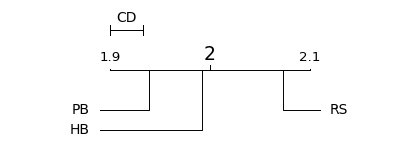

In [10]:
# We use the data of all benchmarks combined, at 10x budget
df=data.loc[data["used_fidelity"]==10]

# Creating the model and running post-hoc analysis using the tukey HSD test
mod=model("value ~ algorithm + (1|benchmark) + prior",df)
post_hoc_results=mod.post_hoc("algorithm")

# Plotting the results
cd_diagram(post_hoc_results)

print("")

In [ ]:
scores = benchmark_clustering(data,("HB","PB"),"prior")

Exception ignored from cffi callback <function _callback at 0x00000181FFE7B130>:
Traceback (most recent call last):
  File "c:\Users\lenak\OFFLINE_FILES\Anton\Git\significance_analysis\.venv_3_10_0\lib\site-packages\rpy2\rinterface_lib\callbacks.py", line 330, in _callback
    callback()
  File "c:\Users\lenak\OFFLINE_FILES\Anton\Git\significance_analysis\.venv_3_10_0\lib\site-packages\rpy2\rinterface_lib\callbacks.py", line 319, in callback
    def callback() -> None:
KeyboardInterrupt: 
